# Wiener Process with Linear Drift


In [23]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

## Parameters

In [13]:
# Drift parameter
a = 2
# Noise parameters
sigma = 0.5
# Time parameters
tStart = 0
tEnd = 10
# Sampling frequency
fs = 5
# Number of histories
nbHist = 100000

## Single history simulation

In [14]:
# Time 
t = np.linspace(tStart, tEnd, (tEnd-tStart)*fs+1)
# Noise
tsigma = (sigma**2)*t
epsilon = np.random.normal(0, np.sqrt(tsigma))
# Observed degradation
Y = a*t+epsilon

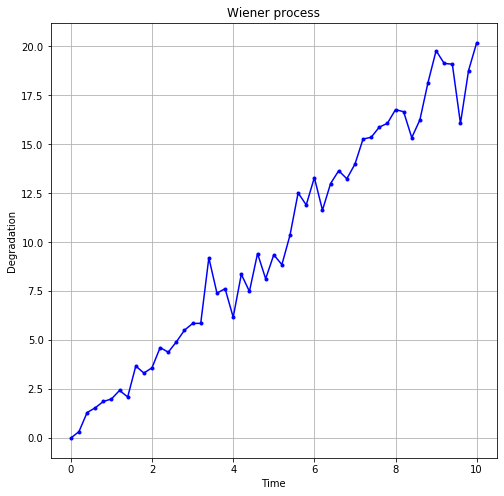

In [15]:
# Illustration
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, Y, '.b-')
ax.set_xlabel('Time')
ax.set_ylabel('Degradation')
ax.set_title('Wiener process')
ax.grid(True)

In [16]:
## An estimation of a
a_est = np.mean(np.diff(Y))*fs
a_est

2.0193742120186524

## Several histories simulation

In [17]:
# Time 
t = np.linspace(tStart, tEnd, (tEnd-tStart)*fs+1)
# Noise
tsigma = ((sigma**2)*t.reshape(t.shape[0], 1))*np.ones((1, nbHist))
epsilon = np.random.normal(0, np.sqrt(tsigma))
# Observed degradation
Y = (a*t.reshape(t.shape[0], 1))*np.ones((1, nbHist))+epsilon

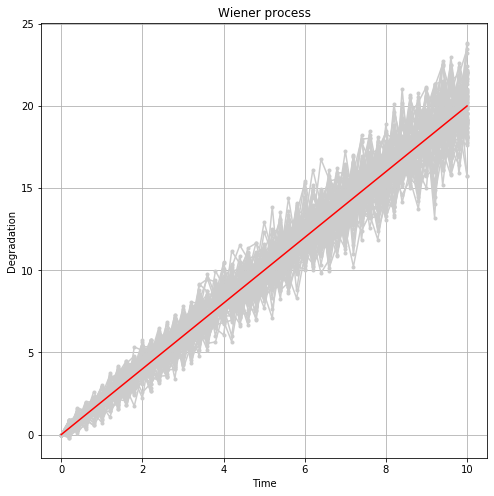

In [18]:
# Illustration
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
for id in range(np.minimum(75, nbHist)):
    ax.plot(t, Y[:, id], '.-', color=(0.8, 0.8, 0.8))
ax.plot(t, a*t, '-', color=(1, 0, 0))
ax.set_xlabel('Time')
ax.set_ylabel('Degradation')
ax.set_title('Wiener process')
ax.grid(True)

## Statistical properties
$\mathrm{E}[Y(t_k)]=at_k$

In [19]:
n1 = int(np.floor(t.shape[0]*0.2))
n2 = int(np.floor(t.shape[0]*0.8))
print('{:f} ≃ {:f}'.format(np.mean(Y[n1,:]), a*t[n1]))
print('{:f} ≃ {:f}'.format(np.mean(Y[n2,:]), a*t[n2]))

4.002554 ≃ 4.000000
15.990000 ≃ 16.000000


$\mathrm{E}[Y(t_{k+1})-Y(t_{k})]=a(t_{k+1}-t_{k})$

In [20]:
print('{:f} ≃ {:f}'.format(np.mean(Y[n1,:]-Y[n1-1,:]), a*(t[n1]-t[n1-1])))
print('{:f} ≃ {:f}'.format(np.mean(Y[n2,:]-Y[n2-1,:]), a*(t[n2]-t[n2-1])))

0.402653 ≃ 0.400000
0.391911 ≃ 0.400000


$\mathrm{var}[Y(t_{k})]=\sigma^2t_{k}$

In [21]:
print('{:f} ≃ {:f}'.format(np.var(Y[n1,:]), (sigma**2)*t[n1]))
print('{:f} ≃ {:f}'.format(np.var(Y[n2,:]), (sigma**2)*t[n2]))

0.496772 ≃ 0.500000
1.987101 ≃ 2.000000


$\mathrm{var}[Y(t_{k+1})-Y(t_{k})]=\sigma^2(t_{k+1}+t_{k})$

In [22]:
print('{:f} ≃ {:f}'.format(np.var(Y[n1,:]-Y[n1-1,:]), (sigma**2)*(t[n1]+t[n1-1])))
print('{:f} ≃ {:f}'.format(np.var(Y[n2,:]-Y[n2-1,:]), (sigma**2)*(t[n2]+t[n2-1])))

0.952118 ≃ 0.950000
3.950292 ≃ 3.950000
